## Real-world data representation using tensors

![RealWorldData](../assets//Always-Has-Been.png)

🤔: how do we take a piece of data, a video, or a line of text, and represent it with a tensor in a way that is appropriate for training a deep learning model?
- Picture is worth of thousand words
- tabular dataset
- ordered tabular dataset (timeseries)
- text (retains its ordered aspect but introduces the problem of representing words as arrays of numbers)


# 🪞IMAGE

In [1]:
from torchvision.io import read_image
from torchvision.transforms import Resize
import torch 

img = read_image('../assets/sippiparai-dog-breed-tamilnadu.jpg')
print(img.shape)

# img is a NumPy array-like object with three dimensions: two spatial dimensions, width and height; and a third dimension corresponding to the RGB channels.
# PyTorch modules dealing with image data require tensors to be laid out as C × H × W : channels, height, and width, respectively. 
# Create a dataset of multiple images to use as an input for our neural networks, we store the images in a batch along the first dimension to obtain an N × C × H × W tensor

c:\Users\muthu\miniconda3\envs\tfenv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


torch.Size([3, 430, 487])


In [2]:
import os
from matplotlib import pyplot as  plt 

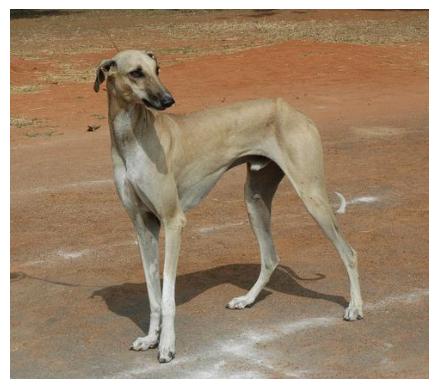

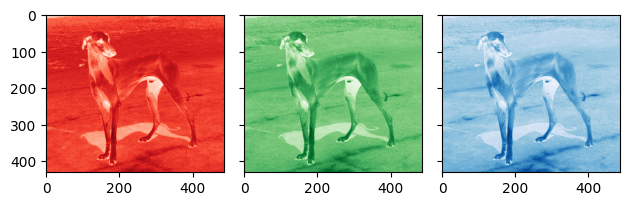

In [3]:

plt.imshow(img.permute(1,2,0))
plt.axis('off')
plt.show()

fig,(ax1,ax2,ax3) = plt.subplots(1,3,sharey='all',tight_layout=True)
ax1.imshow(img[0,:,:].unsqueeze(0).permute(1,2,0),cmap="Reds")
ax2.imshow(img[1,:,:].unsqueeze(0).permute(1,2,0),cmap='Greens')
ax3.imshow(img[2,:,:].unsqueeze(0).permute(1,2,0),cmap="Blues")
plt.show()

We've so many [color_model](https://en.wikipedia.org/wiki/Color_model)
- Munsell
- HSL
- HSV
- CIE
- XYZ


In [4]:
r = Resize(size=(224,224))
num_imgs = 3

batch = torch.zeros(num_imgs,3,224,224,dtype=torch.float32)
for idx,i in enumerate(os.listdir('../assets/img-dog/')):
    t_=r(read_image(f'../assets/img-dog/{i}'))
    batch[idx] +=t_.type_as(batch)

batch /= 255.

c:\Users\muthu\miniconda3\envs\tfenv\lib\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 3, 224, 224])


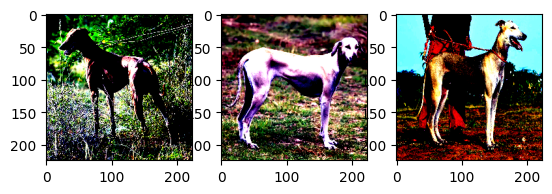

In [5]:
mean = batch.mean(dim=(0,2,3))
std  = batch.std(dim=(0,2,3))

batch =( batch - mean.view(1,3,1,1)) / std.view(1,3,1,1)

print(batch.shape) # N,C,H,D

# For volume metric data, there’s no fundamental difference between a tensor storing volumetric data versus image data.
# N * C * D * H * W  (5D)

fig,axs = plt.subplots(1,3)
for i,ax in zip(range(batch.shape[0]),axs):
    axs[i].imshow(batch[i].permute(1,2,0).numpy())
plt.show()

![read_dcm](../assets/read%20pydcm.png)

In [6]:
import imageio
vol_arr = imageio.volread('../assets/volumetric-dicom-LUNGS','DICOM')
print(vol_arr.shape)

Reading DICOM (examining files): 1/3 files (33.3%3/3 files (100.0%)


  Found 1 correct series.
Reading DICOM (loading data): 3/3  (100.0%)
(3, 512, 512)


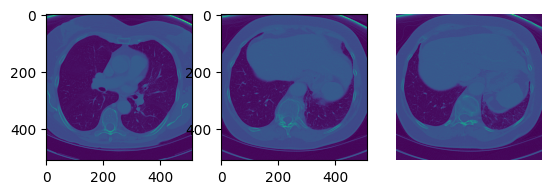

In [7]:
fig,axs = plt.subplots(1,3)
for i,ax in zip(range(vol_arr.shape[0]),axs):
    axs[i].imshow(vol_arr[i])
plt.axis('off')
plt.show()


# ☑️ Tabular Data

In [8]:
import numpy as np 
import pandas as pd

In [9]:
wine_equality = np.loadtxt('../assets/winequality-white.csv',dtype=np.float32,delimiter=";",skiprows=1)
df = pd.read_csv('../assets/winequality-white.csv',sep=';')


wineq = torch.from_numpy(df.values)
print(wineq.shape, wineq.dtype)

torch.Size([4898, 12]) torch.float64


**[Level of Measurement](https://en.wikipedia.org/wiki/Level_of_measurement)** Continuous, ordinal, and categorical values 

Three Kind of Numerical Value
- continous (strict order and difference btwn values matters)
- ordinal (strict order and relationship btwn values no longer applies) i.e)It’s important to remember that we can’t “do math” on the values outside of ordering them
- categorical (neither ordering and nor numerical) (advantage of OHE and embedding)

![ohe](../assets/ohe.png)

In [10]:
data = wineq[:,:-1]
target = wineq[:,-1]   # string assigning integer number to each it

print(target.shape, target.dtype, target.unique())

data_normalized = data-data.mean(dim=0)/ data.std(0)

torch.Size([4898]) torch.float64 tensor([3., 4., 5., 6., 7., 8., 9.], dtype=torch.float64)


## OHE

encode each of the 10 scores in a vector of 10 elements, with all elements set to 0 but one, at a different index for each score
e.g)

1 -> (1,0,0,0,0,0,0,0,0,0)

2 -> (0,1,0,0,0,0,0,0,0,0)

3 -> (0,0,1,0,0,0,0,0,0,0)


In [12]:
ohe_target = torch.eye(10)[target.numpy()]
# If target is a 1D array of length n, the output shape would be (n, 10) because each value in the target array corresponds to selecting one row from the 10x10 identity matrix.

r = torch.rand(5,).mul(target.shape[0]).int()
for idx,i in enumerate(zip(ohe_target[r],target[r])):
    print(i[0],i[1].item())

tensor([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]) 6.0
tensor([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]) 5.0
tensor([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]) 5.0
tensor([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]) 5.0
tensor([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]) 6.0


In [13]:
bad_data = data[target<=3];             bad_data_mean = bad_data.mean(0)
mid_data = data[(target>3)&(target<7)]; mid_data_mean = mid_data.mean(0) 
good_data= data[target>7];              good_data_mean = good_data.mean(0)

In [14]:
for idx,col,bad_mean,mid_mean,good_mean in zip(range(12),df.columns[:-1],bad_data_mean,mid_data_mean,good_data_mean):
    print(f"{idx}:: {col:30}{bad_mean.item():20}\t{mid_mean.item():20}\t{good_mean.item()}")

0:: fixed acidity                                  7.6	   6.886877946568884	6.678333333333333
1:: volatile acidity               0.33325000000000005	  0.2815322158198009	0.2779722222222222
2:: citric acid                                  0.336	  0.3364405447878471	0.32816666666666666
3:: residual sugar                              6.3925	   6.705107386066004	5.628333333333334
4:: chlorides                     0.054299999999999994	 0.04784101623886853	0.03801111111111112
5:: free sulfur dioxide                         53.325	  35.424044002095336	36.62777777777778
6:: total sulfur dioxide                         170.6	  141.83302776322682	125.88333333333334
7:: density                         0.9948840000000001	  0.9944713750654792	0.9922143888888889
8:: pH                                          3.1875	  3.1808119434258773	3.2211666666666665
9:: sulphates                       0.4744999999999999	 0.48706914614981667	0.48566666666666675
10:: alcohol                                     1